#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 5
#### Topics:
- Contrasts
- Multiple TestinFalse-Discovery Rate
- Simple Regression

#### Due: 24/05/2022 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

**Name**: Ofir Nesher

**Student ID**: 204502926

**Date**: 13/05/2022

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Multiple testing in Practice)
#### Continuation of Problem 4 from HW4

In HW4, Problem 4 you used ANOVA to measure the effect of the winery (``winery``) on the quality (``points``) of wines from variety (``variety``) ``Cabernet Sauvignon``. Using the same dataset (reduced to Israeli wines and a specific variety). You used all t-tests involving pairs of wineries and reported pairs found significant after a Bonfferoni's correction. In this question, you will use Binjamini-Hochberg's (BH) FDR controlling procedure as an alternative to Bonfferoni.
 1. Using HW4, Problem 4, consider P-values from all t-tests of pairs of wineries. Sort the P-values from small to large and plot the smallest 10% of the sorted list of P-values on a stem or a scatter plot in which the x-axis indicate the P-value rank (left most point is rank = 1, i.e., the smallest) and the y-axis the P-value's value.
 2. Assume that different tests are independent; apply BH to select a set of winery pairs in which one winery is significantly better than the others while aiming for 0.05 false pairs. How many pairs were reported? is it more or less pairs than you discovered using Bonfferoni correction in HW4, Problem 4?
 3. Repeat the last item without the independence assumption, i.e., use the harmonic sum correction.

The point: FDR controlling using BH is a more liberal (less conservative) approach to identify significant discoveries in the sense that it allows us to report on more discoveries if we are willing to replace family-wise error rate control with an expected false-discovery proportion guarantee.

### **Answers**:

#### 1.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
wine_df = pd.read_csv('winemag-data_first150k.csv')
wine_df = wine_df[(wine_df['country'] == 'Israel') & (wine_df['variety'] == 'Cabernet Sauvignon')]
all_wineries = wine_df['winery'].value_counts() > 1
wineries = list(all_wineries[all_wineries].index.values)
wine_df = wine_df[wine_df['winery'].isin(wineries)]
variable = 'points'
print(wine_df.describe())

In [ ]:
def two_smp_t(smp1, smp2):
    return stats.ttest_ind(smp1, smp2).pvalue


tests_res = {}

for w1 in wineries:
    for w2 in wineries:
        if w1 < w2:
            smp1 = wine_df[wine_df.winery == w1][variable].values
            smp2 = wine_df[wine_df.winery == w2][variable].values
            tests_res[(w1, w2)] = two_smp_t(smp1, smp2)

tests_res

In [ ]:
pv = list(tests_res.values())
m = len(pv)

idcs = np.argsort(pv)
sorted_pvals = np.array(pv)[idcs]

percentage = 10
sub_list_length = int(len(sorted_pvals) / percentage)
sub_list_p_values = sorted_pvals[:sub_list_length]
sub_list_p_values

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 7)
plt.rcParams.update({'font.size': 18})

In [ ]:
x_axis = range(sub_list_length)
plt.scatter(x_axis, sub_list_p_values)
plt.xlabel('Rank')
plt.ylabel('p-value')
plt.title(f'Smallest {percentage}% p-values in order')
plt.show()

#### 2.
Assume that different tests are independent; apply BH to select a set of winery pairs in which one winery is significantly better than the others while aiming for 0.05 false pairs. How many pairs were reported? is it more or less pairs than you discovered using Bonfferoni correction in HW4, Problem 4?

##### Binjamini and Hochberg
Reject all $p_{(i)} \leq q \cdot i/m$

In [ ]:
alpha = 0.05

In [ ]:
plt.scatter(np.arange(1, len(pv) + 1), sorted_pvals)

# Bonferroni's:
plt.plot([1, m], [alpha / m, alpha / m], '--r', alpha=.3)
plt.plot([1, m], [alpha, alpha], '--g', alpha=.3)

# BH:
ell = np.arange(1, m + 1) / m * alpha
plt.plot(np.arange(1, m + 1), ell, '--b')

plt.ylabel('p-value')
plt.xlabel('test #')
plt.show()

In [ ]:
# Discoveries by Bonferroni:
rejected_bonferroni = sorted_pvals * len(sorted_pvals) < alpha
rejected_bonferroni_pairs_list = [list(tests_res.keys())[i] for i in idcs[rejected_bonferroni]]

print(f"Discovered by Bonferroni:\n"
      f"{rejected_bonferroni_pairs_list}")

# Discoveries by BH:
rejected_BH = sorted_pvals < ell
rejected_BH_pairs_list = [list(tests_res.keys())[i] for i in idcs[rejected_BH]]
print(f"\nDiscovered by BH:\n"
      f"{rejected_BH_pairs_list}")

In [ ]:
print(f'There are {len(rejected_BH_pairs_list)} false pairs using BH.\n'
      f'It is MORE pairs than we discovered using Bonfferoni correction ({len(rejected_bonferroni_pairs_list)} pairs).')

#### 3.
Repeat the last item without the independence assumption, i.e., use the harmonic sum correction.

##### Without assuming independence or PRD

In [ ]:
plt.scatter(np.arange(1, len(pv) + 1), sorted_pvals)

# Discoveries by Bonferroni's:
ell = np.arange(1, m + 1) / m * alpha
ell_dep = np.arange(1, m + 1) / m * alpha / (np.log(m))

plt.plot([1, m], [alpha / m, alpha / m], '--r', alpha=.3)
plt.plot([1, m], [alpha, alpha], '--g', alpha=.3)

plt.plot(np.arange(1, m + 1), ell, '--b', alpha=.3)
plt.plot(np.arange(1, m + 1), ell_dep, '--m')

plt.ylabel('p-value')
plt.xlabel('test #')
plt.show()

In [ ]:
rejected_BH_without_independence = sorted_pvals < ell_dep
rejected_BH_without_independence_pairs_list = [list(tests_res.keys())[i] for i in
                                               idcs[rejected_BH_without_independence]]
print(f"Discovered by BH w/o independence assumption:\n"
      f"{rejected_BH_without_independence_pairs_list}\n")

print(
    f'There are {len(rejected_BH_without_independence_pairs_list)} false pairs using BH w/o independence assumption.\n'
    f'It is MORE pairs than we discovered using Bonfferoni correction ({len(rejected_bonferroni_pairs_list)} pairs).')

---

## Problem 2 (contrasts)
#### Continuation of Problem 1

Using a single t-test, test the assumption that the average of the Golan area wineries: ``Bazelet HaGolan``, ``Gamla``, ``Golan Heights Winery`` have the same quality as the average of Judean Hills area wineries: ``Katlav``, ``Psagot``, ``Shiloh Winery``, ``Titora``, ``Yatir`` (the goal here is to construct a "contrast", hence you should take an arithmetic average of group averages. You should only consider the size of each individual group when evaluating the variance of the contrast).

Note: you can ignore the ``province`` filed in the data because it contains inaccurate information. You should also ignore the fact that in reality, ``Gamla`` is produced by ``Golan Heights Winery``.

### **Answers**:

In [ ]:
golan_area_wineries_list = ['Bazelet HaGolan', 'Gamla', 'Golan Heights Winery']
judean_hills_area_wineries_list = ['Katlav', 'Psagot', 'Shiloh Winery', 'Titora', 'Yatir']
golan_area_wineries_df = wine_df[wine_df['winery'].isin(golan_area_wineries_list)]
judean_hills_area_wineries_df = wine_df[wine_df['winery'].isin(judean_hills_area_wineries_list)]

In [ ]:
y_bar_golan = golan_area_wineries_df.groupby('winery').apply(lambda x: np.average(x[variable]))
y_bar_judea = judean_hills_area_wineries_df.groupby('winery').apply(lambda x: np.average(x[variable]))

lambda_golan = [1 / len(golan_area_wineries_list)] * len(golan_area_wineries_list)
lambda_judea = [-1 / len(judean_hills_area_wineries_list)] * len(judean_hills_area_wineries_list)

n_golan = golan_area_wineries_df.groupby('winery').apply(lambda x: len(x)).values
n_judea = judean_hills_area_wineries_df.groupby('winery').apply(lambda x: len(x)).values

lambdas = np.array(lambda_golan + lambda_judea)
y_s = np.concatenate([y_bar_golan.values, y_bar_judea.values])
n_s = np.concatenate([n_golan, n_judea])

In [ ]:
def ssquares(x):
    return np.sum((x - np.mean(x)) ** 2)


n = len(wine_df)
k = len(wine_df['winery'].unique())
ss_within = wine_df.groupby('winery')[variable].agg(ssquares).sum()
MS_within = ss_within / (n - k)

In [ ]:
s = np.sqrt(MS_within)
t = (np.sum(lambdas * y_s)) / (s * np.sqrt(np.sum((lambdas ** 2) / n_s)))
t

In [ ]:
from scipy.stats import t as ttest

p_value = ttest.sf(abs(t), n - k)
p_value

In [ ]:
So we cannot reject the null hypo. that claims that the average of the Golan area wineries have the same quality as the average of Judean Hills area wineries since our p-value is too large.

---

## Problem 3 (Exact size of Bonferroni's test)
Suppose that we run multiple tests with independent data and obtain P-values $p_1,\ldots,p_n$. We wish to test the null hypothesis:
$$
H_0\,:\,\text{All tests are null}
$$
at the level $\alpha$ (e.g., $\alpha=0.05$). In class, we introduced Bonferroni's procedure which is equivalent to: Reject $H_0$ if $\min p_i \leq \alpha/n$.
1. Show that the  size of the test in Bonferroni's procedure is at most $\alpha$, regardless if the hypotheses are independent or not.
2. Assuming that the hypotheses are independent, find the exact size of the test in Bonferroni's procedure.
3. For $\alpha=0.05$, evalaute the difference between $\alpha$ and the exact test's size for $n=2,...,50$. Discuss what you see.



### **Answers**:

#### 1.

- We have n tests (e.g n=${m \choose j}$ where j <= m)
- We conduct each test at level $\frac{\alpha}{n}$ (e.g. for t-tests, we reject based on $t_{m-k}^{(1-\frac{\alpha}{2n})}$)
- Under this procedure:
$$Pr(reject \quad something | H_0 \quad is \quad true) =$$
$$Pr(min \quad p_i <= \frac{\alpha}{n}) =$$
$$Pr[(p_1 <= \frac{\alpha}{n}) \cup (p_2 <= \frac{\alpha}{n}) \cup \cdots \cup (p_n <= \frac{\alpha}{n})] =$$

$$\sum_{i=1}^{n} Pr(p_i <= \frac{\alpha}{n}) =$$
$$\sum_{l=1}^{n} \frac{\alpha}{n} <= n \cdot \frac{\alpha}{n} = \alpha$$


#### 2.
Using this step from above, we can expand it:

$$Pr[(p_1 <= \frac{\alpha}{n}) \cup (p_2 <= \frac{\alpha}{n}) \cup \cdots \cup (p_n <= \frac{\alpha}{n})] =$$
$$1 - Pr[(p_1 > \frac{\alpha}{n}) \cap (p_2 > \frac{\alpha}{n}) \cap \cdots \cap (p_n > \frac{\alpha}{n})] =$$
$$1 - \prod_{i=1}^{n} Pr(p_i > \frac{\alpha}{n}) =$$
$$1 - \prod_{i=1}^{n} [1 - Pr(p_i <= \frac{\alpha}{n})]$$

And again, from above $Pr(p_i <= \frac{\alpha}{n}) = \frac{\alpha}{n}$ so:
$$1 - \prod_{i=1}^{n} [1 - \frac{\alpha}{n}] =$$
$$1 - (1 - \frac{\alpha}{n})^n$$

#### 3.

In [19]:
alpha = 0.05

for n in range(2, 51):
    print(f'n={n}, value={1 - (1 - (alpha / n)) ** n}')

n=2, value=0.04937500000000006
n=3, value=0.04917129629629646
n=4, value=0.049070288085937275
n=5, value=0.04900995010000009
n=6, value=0.04896983531023591
n=7, value=0.04894123581227394
n=8, value=0.04891981559586811
n=9, value=0.04890317281799017
n=10, value=0.048889869534228136
n=11, value=0.0488789922522731
n=12, value=0.04886993281129881
n=13, value=0.04886227064981796
n=14, value=0.048855705648663816
n=15, value=0.04885001789563237
n=16, value=0.048845042569365726
n=17, value=0.04884065370486401
n=18, value=0.04883675338038196
n=19, value=0.04883326432487012
n=20, value=0.04883012474683324
n=21, value=0.048827284642970814
n=22, value=0.04882470311503839
n=23, value=0.048822346387668136
n=24, value=0.04882018632241558
n=25, value=0.048818199288886865
n=26, value=0.04881636529671696
n=27, value=0.04881466732067341
n=28, value=0.0488130907705423
n=29, value=0.048811623070831534
n=30, value=0.048810253324615305
n=31, value=0.048808972042497345
n=32, value=0.048807770922485005
n=33, v

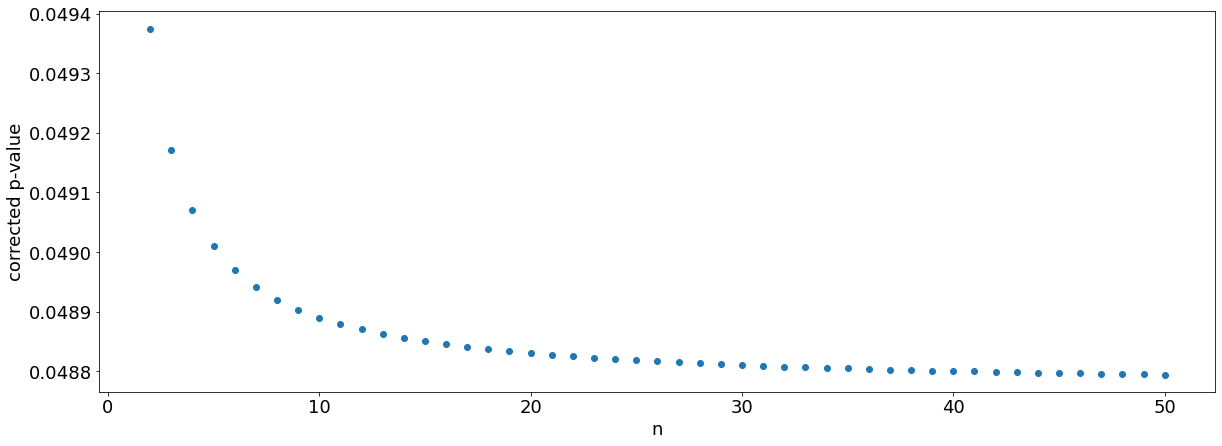

In [20]:
n_range = np.arange(2, 51)
corrected_p_value = [1 - (1 - (alpha / n)) ** n for n in n_range]
plt.scatter(n_range, corrected_p_value)
plt.ylabel('corrected p-value')
plt.xlabel('n')
plt.show()

(https://helpwithstatistics.com/significance-and-effect-size-the-bonferroni-correction)
As n increases, the p value threshold for rejecting the Null decreases dramatically as well.

The problem is that, by setting the p value so low, there is a decreasing chance that you have rejected a finding that really holds in the larger population.

Even with p<=0.05, and n=50 without Bonferroni\'s correction, there is a 90% chance that you reject a TRUE finding, but we rarely pay much attention to those (type II) errors - they become important in medical research, where failure to recognize a carcinogen, for example, can lead to fatal consequences.

---

## Problem 4 (Prediction in Simple Regression)
Consider the linear model:
$$
    y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\qquad \epsilon_i \simiid \Ncal(0,\sigma^2)
$$
$$
    Z = \begin{pmatrix}
    1 & x_1 \\
    \vdots & \vdots \\
    1 & x_n
    \end{pmatrix},\quad \beta=\begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix},\qquad \hat{\beta}=(Z^\top Z)^{-1} Z^\top y
$$
Suppose we get a new data point $x_{n+1}$ and want to predict $y_{n+1}$. We want an interval in which this prediction will likely to land. In class, we used that
$$
\var[\hat{\beta}_0 + \hat{\beta}_1 x] = \sigma^2 \left( \frac{1}{n} + \frac{(x-\bar{x})^2}{S_{XX }}\right)
$$
to obtain a confidence interval for $\beta_0 + \beta_1 x$, and a confidence band for all $x \in \reals$. In this question, you will use a similar reasoning to get a confidence interval (and bands) for $y_{n+1}$.
1. Find the variance of $y_{n+1} - (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})$ in terms of $\sigma^2$ and $x_1,\ldots,x_n$ and $x_{n+1}$ (you can use $\bar{x}$ and $S_{XX}$ or any other well-defined function of $x_1,\ldots,x_n$). Explain intuitively why it makes sense that this variance is larger than the variance of  $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$.
2. Find a $1-\alpha$ confidence interval for $y_{n+1}$. Is this interval wider or narrower than that of $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$? For what value of $x_{n+1}$ this interval is the narrowest?
3. Suppose that we take the average of two responses $y$'s at the same $x_{n+1}$, say
$$
y_{n+1} =  \frac{y_{n+1}^{(1)} + y_{n+1}^{(2)}}{2},
$$
where
$$
y_{n+1}^{(1)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(1)}
$$
and
$$
y_{n+1}^{(2)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(2)},
$$
where $\epsilon_{n+1}^{(1)}$ and $\epsilon_{n+1}^{(2)}$ are independent. Find a confidence interval for $y_{n+1}$. Is it wider or narrower than the interval in (2) ?

Note: The confidence interval you derived in 2 is somewhat risky to use because it makes the strong assumption that $\epsilon_{n+1}$ is normal. This is compared to, say, confidence intervals for $\hat{\beta}_0$ and $\hat{\beta}_1$ which rely on averages over all observations $y_1,\ldots,y_n$, so we can use the Central Limit Theorem to argue for normality. Things get better both in terms of variance and normality when you can take multiple measurements at the same $x_{n+1}$ and average these measurements.


### **Answers**:

#### 1.
$$
\var[y_{n+1} - (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] =$$
$$\var(y_{n+1}) + \var(\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}) - 2 cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] =
$$
$$\sigma^2 + \sigma^2 \left( \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right) - 2 cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})]
$$

We know that $\operatorname{cov}(X+a, Y+b)=\operatorname{cov}(X, Y)$ and that $\operatorname{cov}(aX, bY) = ab \operatorname{cov}(X, Y)$

And more genereally: $\operatorname{cov}(a X+b Y, c W+d V)=a c \operatorname{cov}(X, W)+a d \operatorname{cov}(X, V)+b c \operatorname{cov}(Y, W)+b d \operatorname{cov}(Y, V)$

So, $cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] = cov[\beta_0 + \beta_1 x_i + \epsilon_i, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] = cov[\epsilon_i, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] =$

$cov(\epsilon_i, \hat{\beta}_0) + x_{n+1} \cdot cov(\epsilon_i, \hat{\beta}_1) = 0 + x_{n+1} \cdot 0$

Therefore, the last term from above ($2 cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})]$) is 0.

Finally,
$$\sigma^2 + \sigma^2 \left( \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right) - 2 cov[y_{n+1}, (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})] =$$

$$\sigma^2 + \sigma^2 \left( \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right) =$$

$$ \sigma^2 \left( 1 +  \frac{1}{n} + \frac{(x_{n+1} - \bar{x})^2}{S_{XX }}\right)$$



Intuitively, it makes sense that this variance is larger than the variance of  $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$ because we added another term.

#### 2.
As we saw in class, with the general formula:

$\beta \in \mathbb{R}^p$.

$Z \in \mathbb{R}^{n \times p}$.

$Y = Z \beta + \epsilon$.

and $Z_0 \in \mathbb{R}^p$.

$$Z_0 ^ T \hat{\beta} \pm t_{n-p}^{1-\alpha/2} \cdot s \sqrt{Z_0 ^ T (Z^\top Z)^{-1} Z_0}$$

So, p = 2, $Z_0 = x_{n+1}$

$$Z_0 ^ T \hat{\beta} = y_{n+1} \pm t_{n-2}^{1-\alpha/2} \cdot s \sqrt{Z_0 ^ T (Z^\top Z)^{-1} Z_0}$$